# This notebook file is for Coursera Capstone


## This project is for prediction of housing price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
#Reading the Dataset
df = pd.read_csv('housing_data.csv')

## Reading the top 5 records of dataframe

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Showing the information regarding dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


## Displaying the statistical parameters of the data

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Analyzing the Data interms of Number of Bedrooms

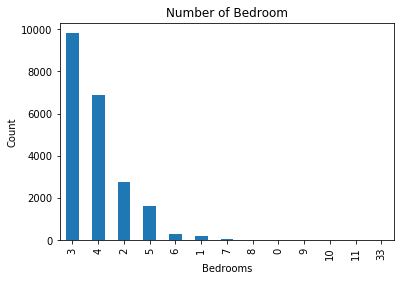

In [6]:
df['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

## Analyzing the Data interms of Number of Bathrooms

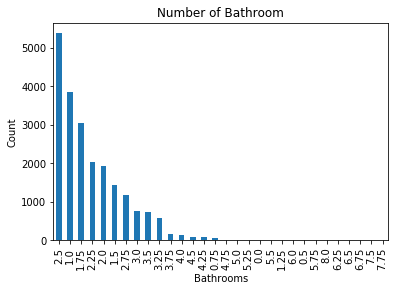

In [7]:
df['bathrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bathroom')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

## Scatterplot for the Number of Bedrooms Vs Price 

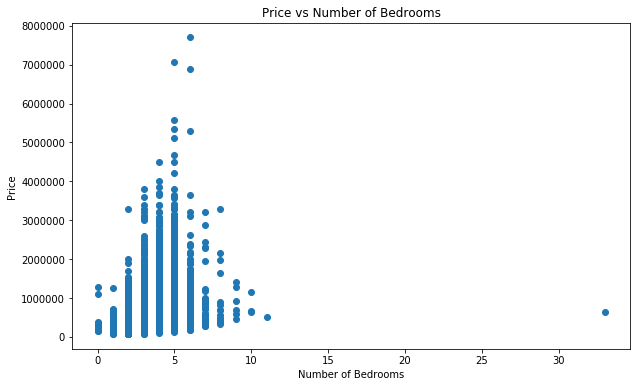

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df['bedrooms'],df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title("Price vs Number of Bedrooms")
plt.show()

## Scatterplot for the Number of Bathrooms Vs Price 

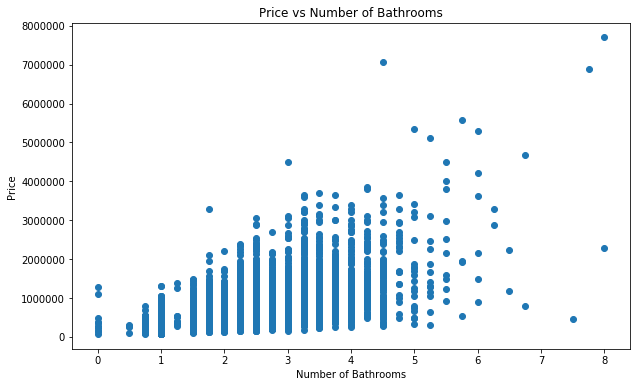

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['bathrooms'],df['price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title("Price vs Number of Bathrooms")
plt.show()

## Scatterplot for the SquareFeet (Living and Basement) Vs Price 

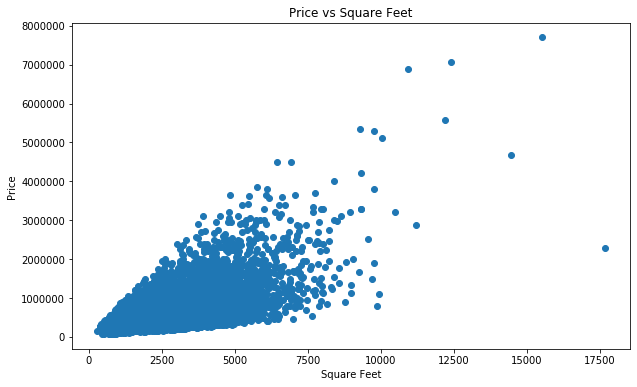

In [10]:
plt.figure(figsize=(10,6))
sqft = df['sqft_living']+df['sqft_basement']
plt.scatter(sqft,df['price'])
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title("Price vs Square Feet")
plt.show()

## Importing Related Libraries

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

## Some Preprocessing on Data

In [12]:
df = df.drop(columns = ['id','date','zipcode','lat','long','yr_renovated','sqft_living15', 'sqft_lot15'])
df['yr_built'] = df['yr_built'].apply(lambda x: pd.to_datetime(x, format='%Y'))
a = datetime.now()
number_of_days_built = []
for y in df['yr_built']:
    number_of_days_built.append(str(datetime.now() - y).split(' ')[0])
# df = df.insert(11, 'number_of_days_built',number_of_days_built)
df['number_of_days_built'] = number_of_days_built
df.head()
df = df.drop(['yr_built'], axis = 1)

In [19]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'number_of_days_built'],
      dtype='object')

## Creating Train and Test Dataset

In [13]:
output_labels = df['price']
train1 = df.drop(['price'], axis=1)
x_train , x_test , y_train , y_test = train_test_split(train1 , output_labels , test_size = 0.10,random_state =2)

## Fitting a Linear Regression Model

In [14]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
reg.score(x_test,y_test)

0.6921499528232571

In [16]:
yhat = reg.predict(x_test)
yhat

array([ 666734.7173257 , 1455081.40947324,  337334.79287786, ...,
        235773.10302775,  296762.28083493,  457592.59874188])

## Comparing the first 20 results for predicted price vs actual price

In [17]:
for i in range(20):
    print(yhat[i])

666734.7173257037
1455081.4094732397
337334.7928778636
1183791.7181299462
191909.52757643093
750748.9054629656
644535.1264871738
551786.66689858
511010.90563124605
820173.714812927
518059.7410385809
770763.7761718391
486380.9898284199
418778.52309299586
609564.2987403814
609511.0448657572
455584.4762055946
1015400.9413598762
1609384.6473029212
1109880.1566380404


In [18]:
actual_price = y_test.reset_index()['price']
actual_price[:20]

0      735000.0
1     1150000.0
2      350500.0
3      860000.0
4      122000.0
5      725000.0
6      417000.0
7      594950.0
8      471000.0
9      634950.0
10     500000.0
11     768000.0
12     323000.0
13     430000.0
14     625000.0
15     710000.0
16     620000.0
17     665000.0
18    1600000.0
19     875000.0
Name: price, dtype: float64

# In this way, a housing price prediction model was built using Linear Regression and a regression score of 0.69 was achieved.

For more accuracy of the model, the greater number of training samples should be used.

                                ## Thank you